In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Piyush\OneDrive\Desktop\PYTHON\TensorFlow_FILES Udemy\DATA\cancer_classification.csv")

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

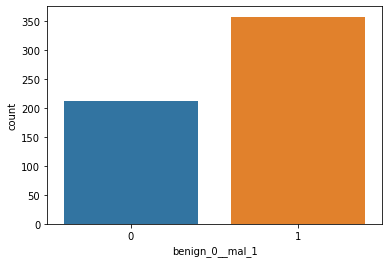

In [8]:
sns.countplot("benign_0__mal_1",data=df)

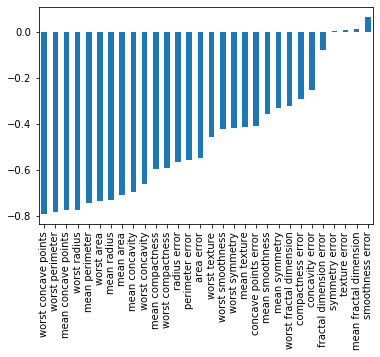

In [16]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

# Train Test split

In [17]:
x = df.drop("benign_0__mal_1",axis=1).values

In [18]:
y = df["benign_0__mal_1"].values

In [20]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [50]:
xtrain = scalar.fit_transform(xtrain)

In [51]:
xtest = scalar.transform(xtest)

# Creating the model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [53]:
xtrain.shape

(426, 30)

In [54]:
model = Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dense(15,activation="relu"))

# Binary classification
model.add(Dense(1,activation="sigmoid"))

In [55]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [56]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest))

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6728 - val_loss: 0.6506
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6433 - val_loss: 0.6183
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6094 - val_loss: 0.5801
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5690 - val_loss: 0.5366
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5257 - val_loss: 0.4842
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4751 - val_loss: 0.4464
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4297 - val_loss: 0.3962
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3850 - val_loss: 0.3576
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3431 - val_loss: 0.3233
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3080 - val_loss: 0.2901
Epoch 11

In [57]:
## Visualize the losses

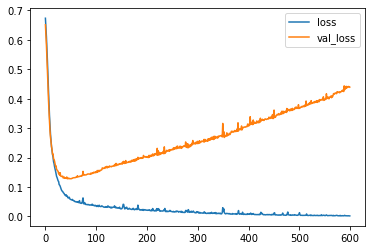

In [59]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [60]:
## Here, we get overfitting graph of loss and val_loss.
## so, we will use Earlystopping

# EarlyStopping

In [95]:
model = Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dense(15,activation="relu"))

# Binary classification
model.add(Dense(1,activation="sigmoid"))

In [96]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',
                          verbose=1,patience=25)

In [99]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.7010 - val_loss: 0.6636
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6667 - val_loss: 0.6406
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6446 - val_loss: 0.6178
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6193 - val_loss: 0.5877
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5902 - val_loss: 0.5566
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5584 - val_loss: 0.5251
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5244 - val_loss: 0.4894
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4877 - val_loss: 0.4531
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4486 - val_loss: 0.4193
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4076 - val_loss: 0.3776
Epoch 11

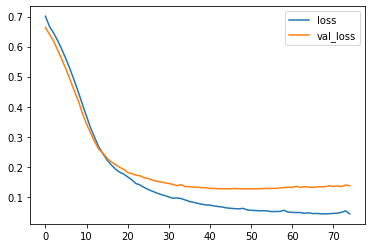

In [100]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [101]:
## Now, we got some descent output

# Dropout

In [103]:
model = Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.5))

# Binary classification
model.add(Dense(1,activation="sigmoid"))

In [104]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [105]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.7255 - val_loss: 0.6851
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6960 - val_loss: 0.6724
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6858 - val_loss: 0.6605
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6678 - val_loss: 0.6447
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6597 - val_loss: 0.6280
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6516 - val_loss: 0.6018
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6285 - val_loss: 0.5769
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5937 - val_loss: 0.5474
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5917 - val_loss: 0.5202
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5741 - val_loss: 0.5037
Epoch 11

In [106]:
loss = pd.DataFrame(model.history.history)

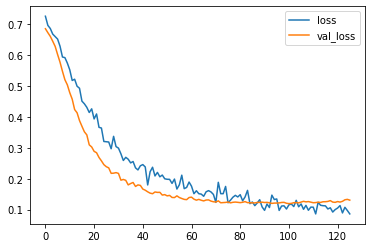

In [107]:
loss.plot()

# Predictions

In [116]:
predictions = model.predict_classes(xtest)
#predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
confusion_matrix(ytest,predictions)

array([[42,  3],
       [ 1, 97]], dtype=int64)

In [120]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.97      0.99      0.98        98

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

